<a href="https://colab.research.google.com/github/abou-zithar/k_means_to_Cluster_unsupervised_data_spark_task_2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prediction using Unsupervised ML

In [ ]:
#import lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# connect to drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# use pandas to read data 
data=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
# drop id col
data.drop(['Id'],inplace=True,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.shape
# 4 features  

(150, 5)

In [ ]:
Species=data[['Species']]


In [ ]:
Species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
data.drop(['Species'],inplace=True,axis=1)
# drop target col to work with data as unsupervised data 

In [ ]:
data.describe()
# see the describe of the data 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'Sample In each Class')

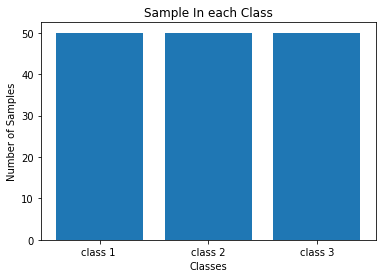

In [ ]:
X=[1,2,3]
plt.bar(X,Species.value_counts())
plt.xticks(X,['class 1 ','class 2','class 3'])
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Sample In each Class")

# kmeans


In [ ]:
# import kmeans
from sklearn.cluster import KMeans

In [ ]:
x=data.values

# Elbow methods

In [ ]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)

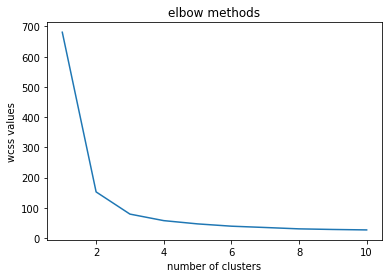

In [ ]:
plt.title('elbow methods')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.plot(range(1,11,1),wcss)

### using k-means++ to fix the centroid problem in k-means

In [ ]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [ ]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_prediction=model.predict(x)

In [ ]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# visualization

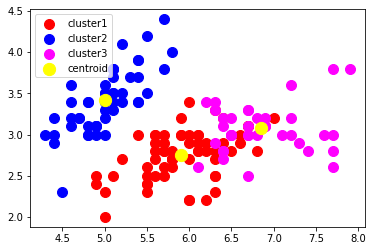

In [ ]:
plt.scatter(x[y_prediction==0,0],x[y_prediction==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_prediction==1,0],x[y_prediction==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_prediction==2,0],x[y_prediction==2,1],s=100,c='magenta',label='cluster3')



plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,c='yellow',label='centroid')
plt.legend()

## silhouette_score to the accuracy


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, model.labels_, metric='euclidean')

In [ ]:
score*100

55.259194454997576